# MAKING MOVIES AT MICROSOFT

Project Overview

Microsoft have decided to create a new movies studio and they have no idea anything about creating movies.The task is to collect,clean and movie data from different sources such as Box offices,IMDB so that we can provide recomendation and insight to the Head of Microsoft's new movie studio to set up a succesful and profitable movie studio.

Data and Exploration.

The data was provided and I choose two data set from the data provided.I sourced data from internet and retrieved the data through web scrapping. The provided data set can be can be located from zippedData folder. 

In my research and anlysis I will explore and give answer in the following question:

1.What impact of Directors of movies have impact in the production and the sales of movies

2.What are the most profitable movies and how much shhould invest in movies.

3.What are most succesfull studios in thhe movie industry

4.which genre is most profitable in the movie industry

Load Dataset with pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

loading various data set

In [2]:
# we load various data that will be using  to anlyze data.
movie_dataframe = pd.read_csv("rt.movie_info.tsv.gz",sep='\t')
movie_dataframe1 = pd.read_csv('moviedirectors.csv')
movie_budget=pd.read_csv("tn.movie_budgets (1).csv.gz")
movie_budgett = pd.read_csv('moviebudget.csv',index_col=0)
movie_budget1 = pd.read_csv('moviebudget.csv1')
movie_l=pd.read_csv('bom.movie_gross (1).csv.gz')
movie_merge = pd.read_csv('moviemerge_studio_csv')
tittle_basics=pd.read_csv('imdb.title.basics.csv.gz')
movie_genre_budget = pd.read_csv('movie_genre_budget.csv')


Question 1: What impact Directors have on the sale of movies interms of Box Office?

I will select movie_dataframe1 for anlaysis in the above question.I will look at Directors column and Box Office.Using group by I will group Directors column and Box Office In which I will calculate the avarage sales of movies interms of box office  by director.Then I will select top 30 Directors in terms of sales.

In [3]:
# first i will load the movie_dataframe1
movie_dataframe1.head()


,Unnamed: 0,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
1,6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
2,7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
3,15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures
4,18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures


In [4]:
#Find the avarage sales of the movies  by director and select the top 30 Directors
selected_movie_data_frame=movie_dataframe1.groupby(['director'],  as_index=False)['box_office'].mean().sort_values(by='box_office', ascending=False)
best_30_director_box_offiice=selected_movie_data_frame.head(30)
best_30_director_box_offiice.head()

,director,box_office
137,Mel Gibson,368000000.0
158,Peter Jackson,303001229.0
26,Chris Columbus,261835892.0
105,Joel Zwick,241250669.0
194,Steven Spielberg,234141872.0


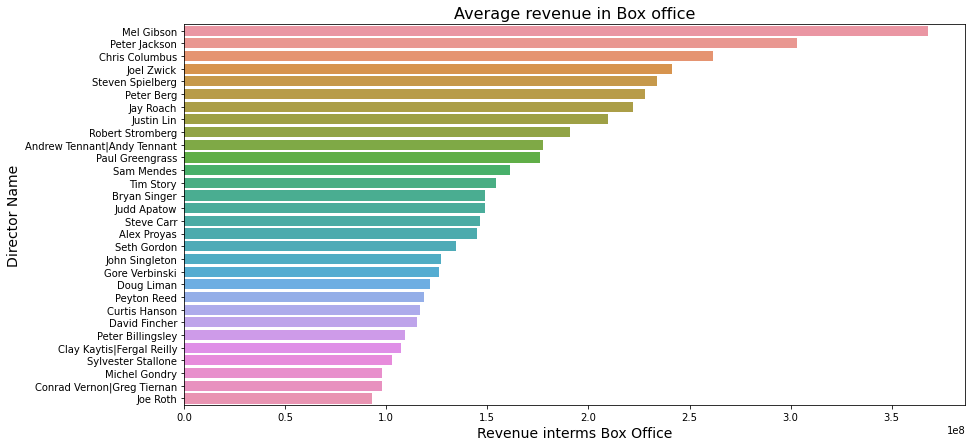

In [5]:
# Will plot bar graph to visualize avarage sales of moviees per Director
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=best_30_director_box_offiice['box_office'], y=best_30_director_box_offiice['director'])
plt.xlabel('Revenue interms Box Office', fontsize=14)
plt.ylabel('Director Name', fontsize=14)
plt.title('Average revenue in Box office', fontsize=16);

reccomendation: Have analysed the most top 30  director from the industry based on the total sale  of the tickets or revenue from box office. From the above analysis I recommend that the Microsoft should hire the best Directors in order for the  movies to sale in Box Office which will eventually  nets to higher profits.

Question2: Whhat are the most profitable movies and how much should one investt in movies?

To the question above I will select the dataframes that contain ther budget data which is movie_budget.I will calculate  the profit and thhe net profit from the data.Then I will look at the correlation between the production budget and the profits of the movies.Finally i will look at the median of the production budget of the movie.

In [6]:
# first will load data that contains the budget
movie_budgett = pd.read_csv('moviebudget.csv')
movie_budgett = movie_budgett.loc[:, ~movie_budgett.columns.str.contains('^Unnamed')]
movie_budgett.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395
2,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864


In [7]:
# first will remove movies that have 0 in the domestic gross and then will calculate the profit and net profit
movie_budgett= movie_budgett[movie_budgett['domestic_gross'] !=0]
movie_budgett['profit'] = movie_budgett['worldwide_gross'] - movie_budgett['production_budget']
movie_budgett['net profit margin'] = movie_budgett['profit'] / movie_budgett['production_budget']
movie_budgett.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,net profit margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,5.532577
1,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,10.041042
2,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,5.710167
3,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,5.827114
4,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,6.669092


In [8]:
# select the 30 most profitable movies
profitable_movie=movie_budgett.head(30)

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


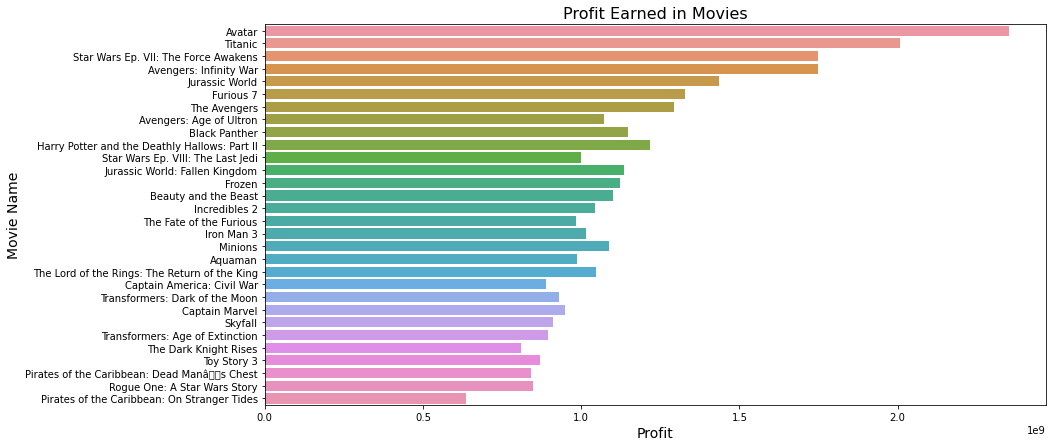

In [9]:
# plot graph of top 30 movies movies agianst their profit
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=profitable_movie['profit'], y=profitable_movie['movie'])
plt.xlabel('Profit', fontsize=14)
plt.ylabel('Movie Name', fontsize=14)
plt.title('Profit Earned in Movies', fontsize=16);

Recommendation:From thhe abbove analysis Avatar,Titanic,star wars are the most succesfull movies produced in terms of their net profits.I reccomend that to the MIcrosoft to emulaate the best practices of the best from the above best movies to ensures the succes movies in terms of the net profits

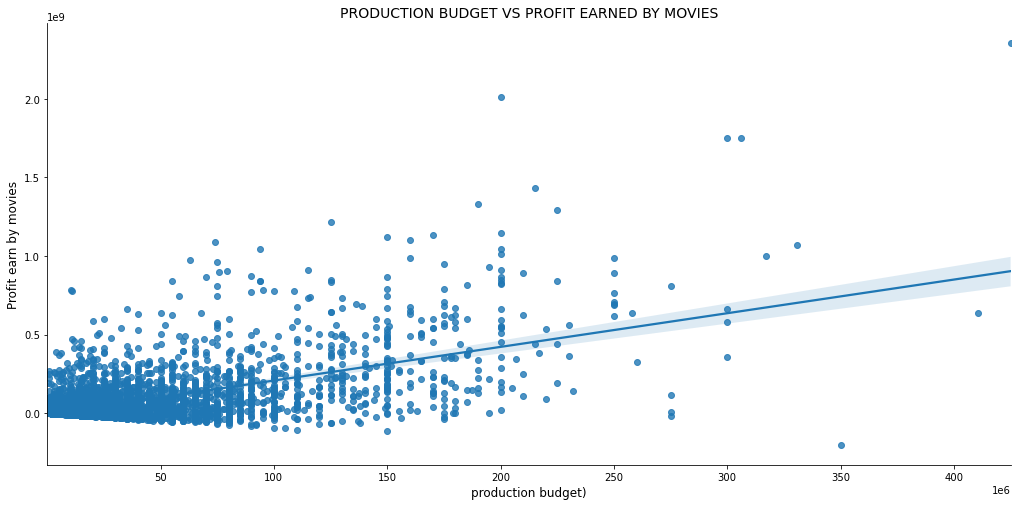

In [153]:
# will plott  a scatter plot production budget vs the profits of movies
sns.lmplot(x='production_budget', y='profit', data=movie_budgett, height=7, aspect=2)
plt.xlabel('production budget)', fontsize=12)
plt.ticklabel_format(axis='x', style='sci', scilimits=(6,6))
plt.ylabel('Profit earn by movies', fontsize=12)
plt.title('PRODUCTION BUDGET VS PROFIT EARNED BY MOVIES', fontsize=14);

Recommendation: From the above scatter plot we can see it is positive trend.From analysis we can see that the more  money put in  movie budget it is likely to generate more profits in movies.I recommend that Microsoft should allocate movies more money in terms of their budget in order to generate more  incomes.

In [11]:
## look at the median
profitable_movie['production_budget'].describe()

count    3.000000e+01
mean     2.210733e+08
std      8.006962e+07
min      7.400000e+07
25%      1.787500e+08
50%      2.000000e+08
75%      2.500000e+08
max      4.250000e+08
Name: production_budget, dtype: float64

In [12]:
profitable_movie['profit'].describe()

count    3.000000e+01
mean     1.148121e+09
std      3.754564e+08
min      6.350639e+08
25%      9.150929e+08
50%      1.044962e+09
75%      1.199584e+09
max      2.351345e+09
Name: profit, dtype: float64

Conclussion.We have analysed and thhhen we based my decision of the allocation on my badget based on thhe median so I I recommend that Microsoft should allocate  around 100 milion dollars to make a movie.

Question3: Which genres are most productive at the movie indusrty?

I will select movie genre Budget dataframe because it contains the data for analysis.I will calculate profit of each genre ,profit margin and theen the percentage of the proofit.

In [23]:
## Load the data containing genres and removing unnamed column
movie_genre_budget.head()
movie_genre_budget = movie_genre_budget.loc[:, ~movie_genre_budget.columns.str.contains('^Unnamed')]
movie_genre_budget.head()

,studio,runtime_minutes,genres,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit,profit_magirn,%_profitt
0,BV,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,868879522,4.344398,4.344398,434.439761
1,WB,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,160000000,835524642,675524642,4.222029,4.222029,422.202901
2,P/DW,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,165000000,756244673,591244673,3.583301,3.583301,358.330105
3,Sum.,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,638102828,9.383865,9.383865,938.386512
4,Par.,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",Iron Man 2,170000000,621156389,451156389,2.653861,2.653861,265.386111


In [27]:
## calculate thhe profit of each genre ,profit margin and percentage profit
movie_genre_budget['profit']=movie_genre_budget['worldwide_gross'] - movie_genre_budget['production_budget']
movie_genre_budget['profit_magirn']=movie_genre_budget['profit'] / movie_genre_budget['production_budget']
movie_genre_budget['%_profitt']= movie_genre_budget['profit_magirn'] * 100
movie_genre_budget.sort_values (by='profit',ascending=False)
movie_genre_budget.head()

,studio,runtime_minutes,genres,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit,profit_magirn,%_profitt
0,BV,103.0,"Adventure,Animation,Comedy",47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,868879522,4.344398,4.344398,434.439761
1,WB,148.0,"Action,Adventure,Sci-Fi",38,"Jul 16, 2010",Inception,160000000,835524642,675524642,4.222029,4.222029,422.202901
2,P/DW,93.0,"Adventure,Animation,Comedy",27,"May 21, 2010",Shrek Forever After,165000000,756244673,591244673,3.583301,3.583301,358.330105
3,Sum.,124.0,"Adventure,Drama,Fantasy",53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,638102828,9.383865,9.383865,938.386512
4,Par.,124.0,"Action,Adventure,Sci-Fi",15,"May 7, 2010",Iron Man 2,170000000,621156389,451156389,2.653861,2.653861,265.386111


In [25]:
## using groupby we caculate the mean of genre
profit_by_movie_genre=movie_genre_budget.groupby('genres').mean()
profit_by_movie_genre.head()

,runtime_minutes,id,production_budget,worldwide_gross,profit,Net profit,profit_magirn,%_profitt
genres,,,,,,,,
Action,111.000000,59.900000,3.232000e+07,9.732942e+07,6.500942e+07,4.133705,4.133705,413.370459
"Action,Adventure",103.000000,54.000000,4.500000e+06,1.177400e+04,-4.488226e+06,-0.997384,-0.997384,-99.738356
"Action,Adventure,Animation",100.000000,48.076923,1.300000e+08,4.779544e+08,3.479544e+08,2.220638,2.220638,222.063829
"Action,Adventure,Biography",124.666667,39.000000,9.000000e+07,2.268429e+08,1.368429e+08,1.166277,1.166277,116.627656
"Action,Adventure,Comedy",112.411765,42.647059,1.027647e+08,4.358324e+08,3.330677e+08,3.375817,3.375817,337.581710


Text(0.5, 1.0, 'Average Profit by genre')

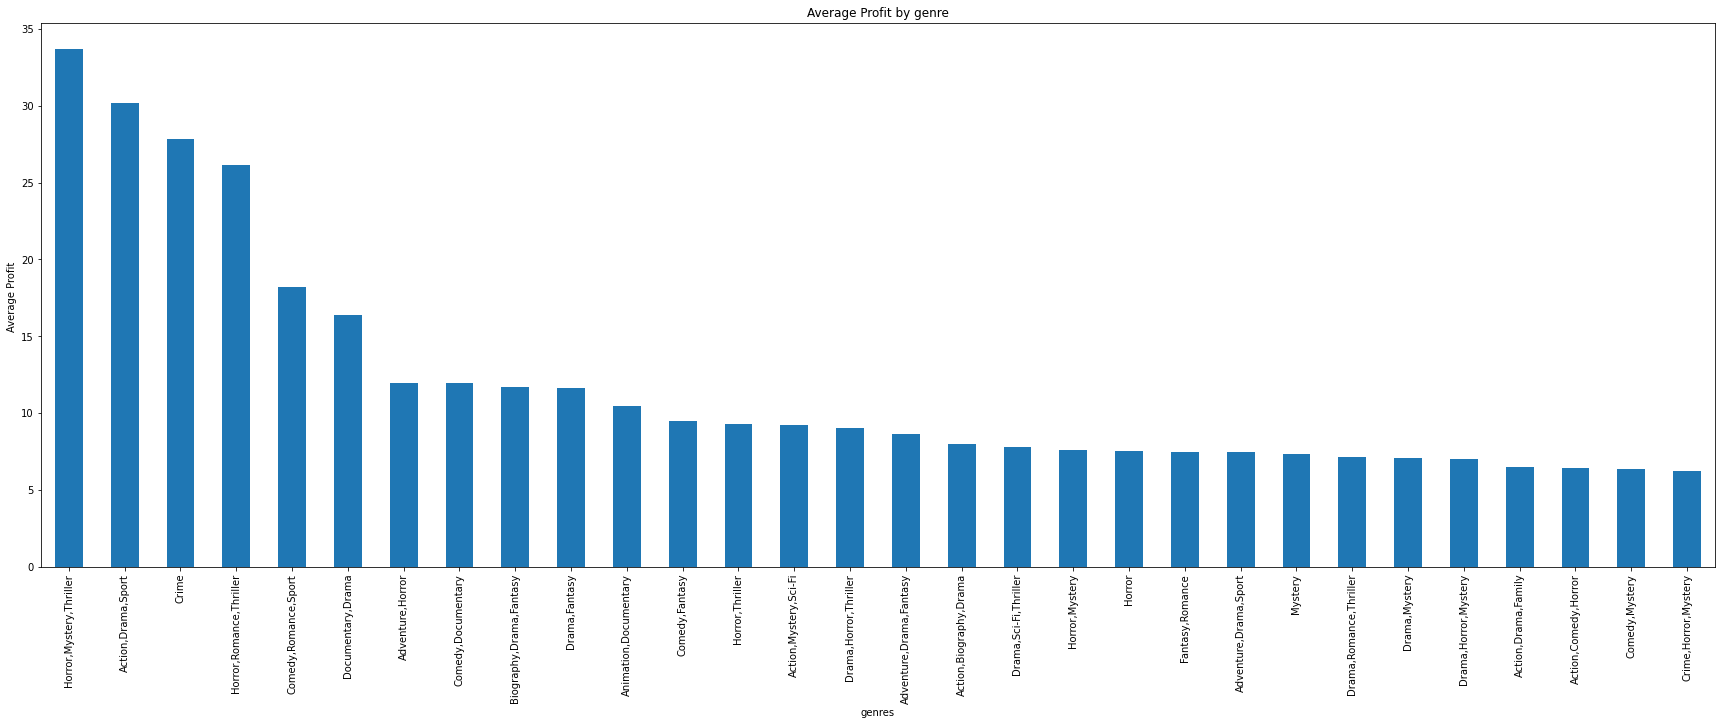

In [16]:
profit_by_movie_genre = profit_by_movie_genre.groupby(['genres'])['profit_magirn'].mean()

profit_by_movie_genre = profit_by_movie_genre.sort_values(ascending=False).head(30)

profit_by_movie_genre.plot.bar(figsize=(30,10))

plt.ylabel('Average Profit ')
plt.title('Average Profit by genre')

Recomendation: From the above annalysis I recommend to Microsoft shhould allocate  budgetts to all genres bbecause they have potential to generate more incomes and profit.The high perfomance genres according to the analysis are Horror,Action,Crime,Thhriller,comedy have succes in terms of their net profits in movie industry

Question4:Which are the most succesfull studios in the movie industry?

In this quesstion I will look at the most succeful studio in thhe world of movie industry. I will analyse the profit and profit  p magirns.

In [132]:
# first I will load thhe data containing thhe studios and removing unnamed column
movie_merge.head()
movie_merge = movie_merge.loc[:, ~movie_merge.columns.str.contains('^Unnamed')]
movie_merge.head()

,studio,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit
0,BV,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,868879522,4.344398
1,WB,38,"Jul 16, 2010",Inception,160000000,835524642,675524642,4.222029
2,P/DW,27,"May 21, 2010",Shrek Forever After,165000000,756244673,591244673,3.583301
3,Sum.,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,638102828,9.383865
4,Par.,15,"May 7, 2010",Iron Man 2,170000000,621156389,451156389,2.653861


In [133]:
## Calculate  profit and net margin of thhe studios
movie_merge['profit']=movie_merge['worldwide_gross'] - movie_merge['production_budget']
movie_merge['%_profit']=(movie_merge['profit'] / movie_merge['production_budget']) * 100
movie_merge.head()

,studio,id,release_date,movie,production_budget,worldwide_gross,profit,Net profit,%_profit
0,BV,47,"Jun 18, 2010",Toy Story 3,200000000,1068879522,868879522,4.344398,434.439761
1,WB,38,"Jul 16, 2010",Inception,160000000,835524642,675524642,4.222029,422.202901
2,P/DW,27,"May 21, 2010",Shrek Forever After,165000000,756244673,591244673,3.583301,358.330105
3,Sum.,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,706102828,638102828,9.383865,938.386512
4,Par.,15,"May 7, 2010",Iron Man 2,170000000,621156389,451156389,2.653861,265.386111


In [135]:
profit_by_movie_studio=movie_merge.groupby('studio').mean()
profit_by_movie_studio.head()

,id,production_budget,worldwide_gross,profit,Net profit,%_profit
studio,,,,,,
3D,31.000000,5.000000e+06,1.651520e+07,1.151520e+07,2.303041,230.304060
A24,48.095238,6.814286e+06,1.904788e+07,1.223359e+07,3.242422,324.242218
ALP,52.000000,2.600000e+07,2.923959e+06,-2.307604e+07,-0.887540,-88.754004
ATO,32.000000,1.250000e+07,2.272186e+06,-1.022781e+07,-0.818225,-81.822512
Affirm,53.500000,3.500000e+06,1.573575e+07,1.223575e+07,3.038448,303.844830


Text(0.5, 1.0, 'Average Profit by Studio')

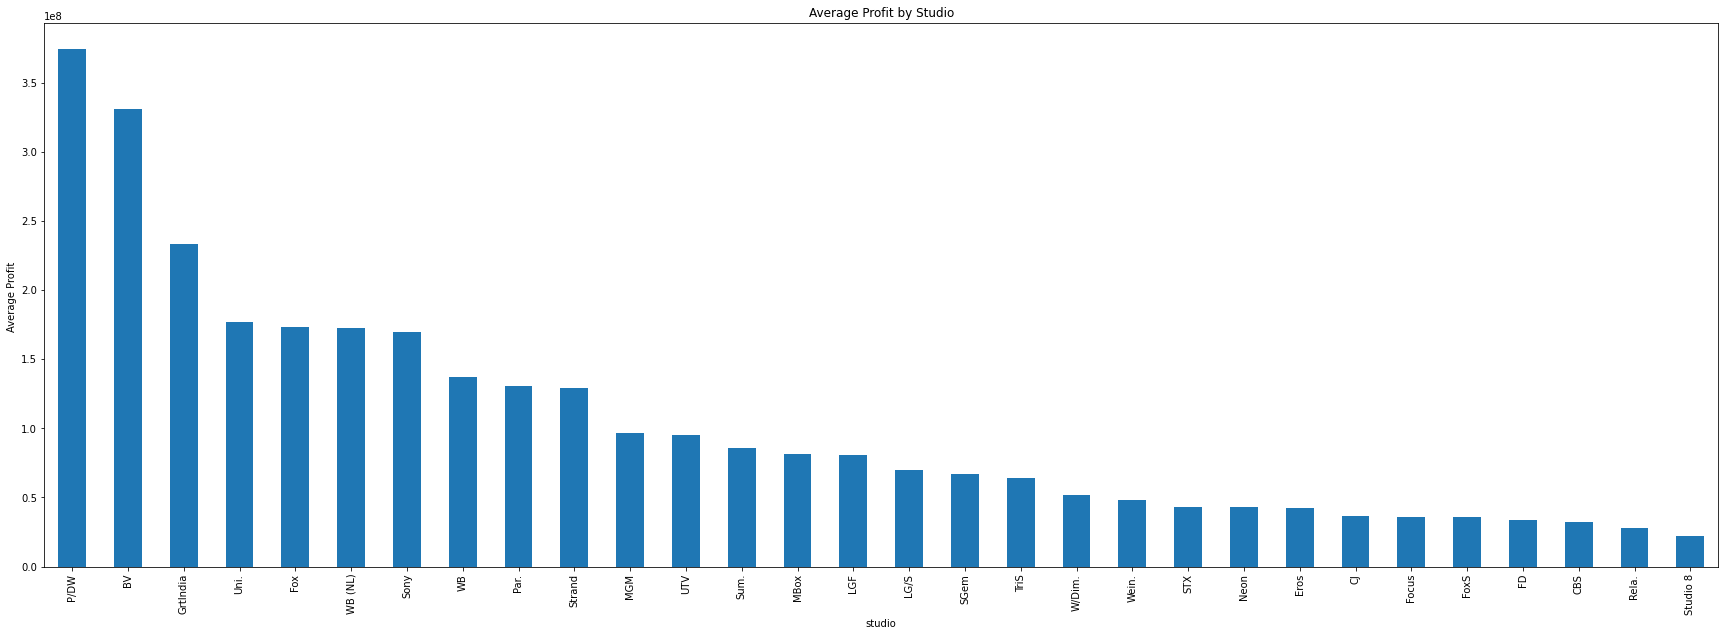

In [136]:
profit_by_movie_studio = profit_by_movie_studio.groupby(['studio'])['profit'].mean()

profit_by_movie_studio = profit_by_movie_studio.sort_values(ascending=False).head(30)

profit_by_movie_studio.plot.bar(figsize=(30,10))

plt.ylabel('Average Profit ')
plt.title('Average Profit by Studio')

Recommendation:That from the data above I recomend is to employ best practices to equivalent to top 10 studios by avarage profit.

In [148]:
profit_by_movie_genre1=movie_merge.groupby(['studio'],  as_index=False)['Net profit'].mean().sort_values(by='Net profit', ascending=False)
profit_by_movie_genre1=profit_by_movie_genre1.head(30)
profit_by_movie_genre1.head()

,studio,Net profit
95,WB (NL),16.495934
89,UTV,11.171985
29,FD,10.316943
61,Orch.,8.538213
38,GrtIndia,7.783430


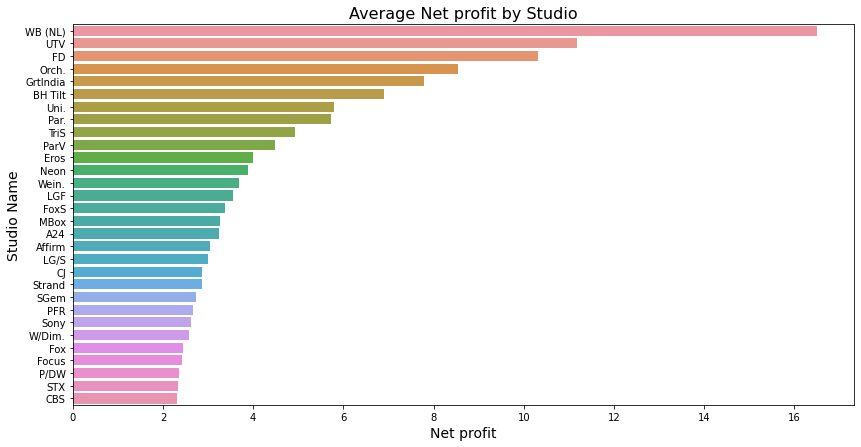

In [151]:
plt.figure(figsize=(14,7))
ax6 = sns.barplot(x=profit_by_movie_genre1['Net profit'], y=profit_by_movie_genre1['studio'])
plt.xlabel('Net profit', fontsize=14)
plt.ylabel('Studio Name', fontsize=14)
plt.title('Average Net profit by Studio', fontsize=16);

From the above analysis there is difference between the net profit and  profit.we could see warner Bross havee hihg much net profits compared to the others which is followed by the UTV nd FD. I recommend that Micrososft should follow the best practises employed by the best movies studios.